In [ ]:
# Import basic Python and math libraries
import numpy as np
import matplotlib.pyplot as plt
import random


In [ ]:
# Define the AES S-box for SubBytes step
sbox = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5,
    0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0,
    0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC,
    0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A,
    0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0,
    0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B,
    0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85,
    0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5,
    0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17,
    0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88,
    0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C,
    0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9,
    0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6,
    0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E,
    0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94,
    0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68,
    0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
]

In [ ]:
# AES first round + Pearson correlation
def sbox_lookup(byte):
    return sbox[byte]

def aes_first_round_byte(pt_byte, key_byte):
    return sbox_lookup(pt_byte ^ key_byte)

def pearson_correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2)) * np.sqrt(np.sum((y - mean_y)**2))
    return numerator / denominator if denominator != 0 else 0


In [ ]:
# Simulate power leakage using Hamming weight + noise
def hamming_weight(n):
    return bin(n).count("1")

def simulate_power_trace(plaintext, key):
    trace = np.random.normal(0, 0.1, 16)  # Add noise
    for i in range(16):
        sbox_out = aes_first_round_byte(plaintext[i], key[i])
        trace[i] += hamming_weight(sbox_out) * 0.25
    return trace


In [ ]:
# Generate fixed key, random plaintexts, and simulated power traces
num_samples = 5000
fixed_key = bytes([random.randint(0, 255) for _ in range(16)])
plaintexts = [bytes([random.randint(0, 255) for _ in range(16)]) for _ in range(num_samples)]
traces = np.array([simulate_power_trace(pt, fixed_key) for pt in plaintexts])

# plaintext and corresponding power trace
example_pt = plaintexts[0]
example_trace = traces[0]

print("Example Plaintext (hex):")
print(' '.join(f"{b:02X}" for b in example_pt))

print("\nSample Power Trace (rounded):")
print('[' + ', '.join(f"{v:.3f}" for v in example_trace) + ']')



Example Plaintext (hex):
D4 4B 93 95 F5 CC 2C 3D 53 26 DF 45 D4 07 86 80

Sample Power Trace (rounded):
[1.022, 1.223, 1.035, 0.928, 0.471, 0.515, 1.519, 1.164, 1.503, 0.971, 1.044, 1.057, 0.508, 1.084, 1.436, 1.573]


In [ ]:
# Recover key byte-by-byte using correlation
recovered_key = []

for byte_index in range(16):
    best_correlation = -1
    guessed_key_byte = -1

    for guess in range(256):
        hyp = [hamming_weight(aes_first_round_byte(pt[byte_index], guess)) for pt in plaintexts]
        corr = pearson_correlation(hyp, traces[:, byte_index])
        if abs(corr) > best_correlation:
            best_correlation = abs(corr)
            guessed_key_byte = guess

    recovered_key.append(guessed_key_byte)
    print(f"Key Byte {byte_index}: Actual = {fixed_key[byte_index]}, Guessed = {guessed_key_byte}, Correlation = {best_correlation:.5f}")


Key Byte 0: Actual = 19, Guessed = 19, Correlation = 0.96070
Key Byte 1: Actual = 26, Guessed = 26, Correlation = 0.96046
Key Byte 2: Actual = 98, Guessed = 98, Correlation = 0.96187
Key Byte 3: Actual = 28, Guessed = 28, Correlation = 0.96267
Key Byte 4: Actual = 134, Guessed = 134, Correlation = 0.96208
Key Byte 5: Actual = 147, Guessed = 147, Correlation = 0.96178
Key Byte 6: Actual = 230, Guessed = 230, Correlation = 0.96365
Key Byte 7: Actual = 6, Guessed = 6, Correlation = 0.96301
Key Byte 8: Actual = 190, Guessed = 190, Correlation = 0.96322
Key Byte 9: Actual = 141, Guessed = 141, Correlation = 0.96022
Key Byte 10: Actual = 255, Guessed = 255, Correlation = 0.96219
Key Byte 11: Actual = 182, Guessed = 182, Correlation = 0.96217
Key Byte 12: Actual = 106, Guessed = 106, Correlation = 0.96382
Key Byte 13: Actual = 154, Guessed = 154, Correlation = 0.96087
Key Byte 14: Actual = 155, Guessed = 155, Correlation = 0.96223
Key Byte 15: Actual = 55, Guessed = 55, Correlation = 0.96152


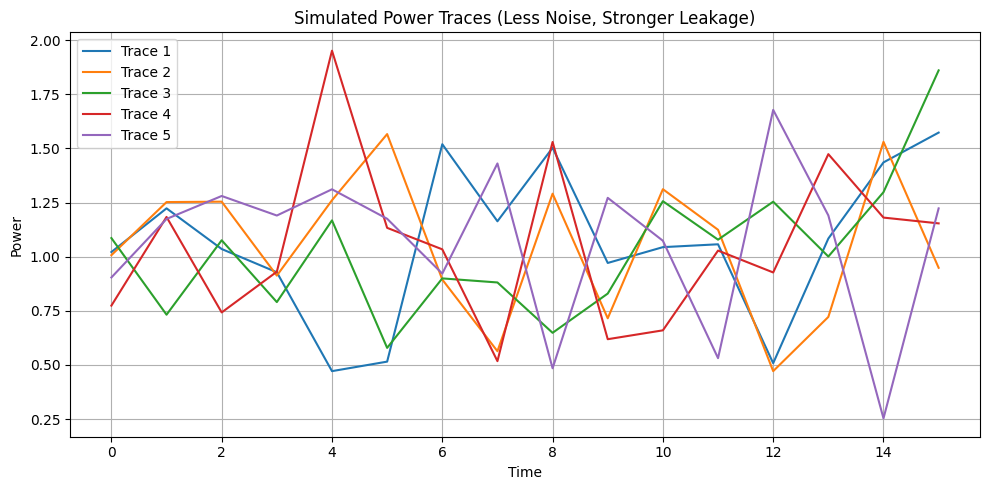

In [ ]:
# Visualization
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.plot(traces[i], label=f"Trace {i+1}")
plt.xlabel("Time")
plt.ylabel("Power")
plt.title("Simulated Power Traces (Less Noise, Stronger Leakage)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Show actual AES key and recovered key from CPA
print("Actual AES Key     :", ' '.join(f"{b:02X}" for b in fixed_key))
print("Recovered AES Key  :", ' '.join(f"{b:02X}" for b in recovered_key))


Actual AES Key     : 13 1A 62 1C 86 93 E6 06 BE 8D FF B6 6A 9A 9B 37
Recovered AES Key  : 13 1A 62 1C 86 93 E6 06 BE 8D FF B6 6A 9A 9B 37
